In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

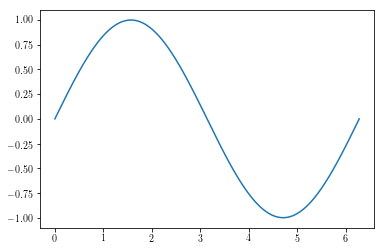

In [2]:
x = np.linspace(0,2*np.pi,1024)
plt.plot(x, np.sin(x))

seaborn を import するだけで、スタイルが適用されます。

In [3]:
import seaborn as sns

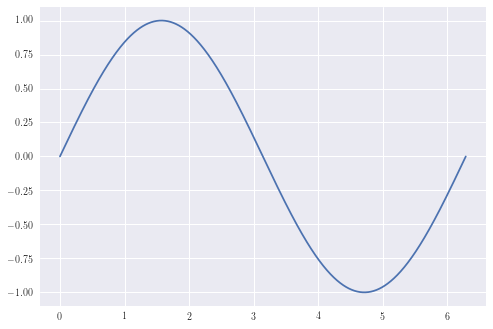

In [4]:
plt.plot(x, np.sin(x))

他のスタイルも適用できます。

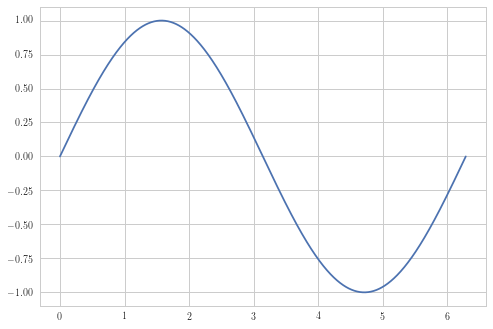

In [5]:
sns.set_style("whitegrid")
plt.plot(x, np.sin(x))

Seaborn は pandas と連携することで真価をみせます。

さきほどの人口データです。

In [54]:
import pandas as pd

df = pd.read_csv("c02.csv", encoding="utf-8")
df

,prefecturecode,prefecture,元号,和暦（年）,year,注,population,male,female
0,00,全国,大正,9,1920,NaN,55963053,28044185,27918868
1,01,北海道,大正,9,1920,NaN,2359183,1244322,1114861
2,02,青森県,大正,9,1920,NaN,756454,381293,375161
3,03,岩手県,大正,9,1920,NaN,845540,421069,424471
4,04,宮城県,大正,9,1920,NaN,961768,485309,476459
5,05,秋田県,大正,9,1920,NaN,898537,453682,444855
6,06,山形県,大正,9,1920,NaN,968925,478328,490597
7,07,福島県,大正,9,1920,NaN,1362750,673525,689225
8,08,茨城県,大正,9,1920,NaN,1350400,662128,688272
9,09,栃木県,大正,9,1920,NaN,1046479,514255,532224


自動的にフィッティングを行わせます。ラベルも自動でつきます。

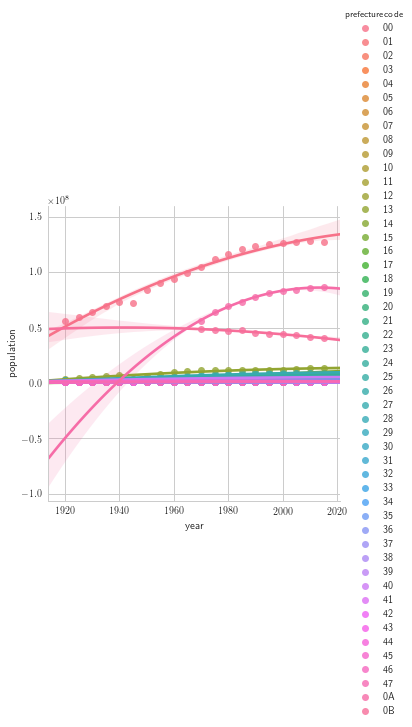

In [16]:
sns.lmplot(x="year", y="population", hue='prefecturecode', order=2, data=df)

1920 年の県別人口と、2000年の県別人口がどのように相関しているか調べたいとします。
これにはpairplotが使えます。

まず、Dataframe を少し変換して、県 × 各年の人口の表の形式にします。

In [56]:
df2 = pd.DataFrame(columns=(np.arange(1920,2015,40)))
for i in range(1,48):
  dfi = df.ix[df.ix[:,'prefecturecode'] == "{:02d}".format(i),['year','population']]
  df2.loc[i] = (np.array(dfi['population']))[1::8]
df2

,1920,1960,2000
1,2498679.0,5171800.0,5627737.0
2,812977.0,1416591.0,1436657.0
3,900984.0,1411118.0,1385041.0
4,1044036.0,1753126.0,2360218.0
5,936408.0,1279835.0,1145501.0
6,1027297.0,1263103.0,1216181.0
7,1437596.0,1983754.0,2091319.0
8,1409092.0,2056154.0,2975167.0
9,1090428.0,1521656.0,2016631.0
10,1118858.0,1605584.0,2024135.0


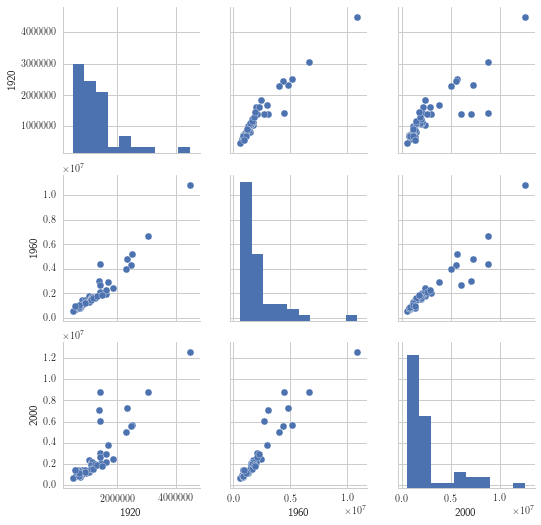

In [57]:
sns.pairplot(df2)